# Dynamics Between Various Influences on a Student's PISA Scroe
## by Hanan H. Hasan

## Investigation Overview


This repository contains an in-depth analysis of the PISA 2012 dataset, focusing on student behaviors, parental influence, and academic performance. I dive into several facets of the dataset, shedding light on the dynamics between various factors and their potential influence on a student's academic success. 
The counterintuitive trend between study time and academic performance, especially in countries like the US and Indonesia.
The surprising impact of parental education levels on student performance in non-OECD countries.
Diverse patterns of computer usage and their potential correlation (or lack thereof) with academic scores.
The pivotal role of student-teacher relationships in shaping academic outcomes.
A comparative analysis of academic performance across key countries, revealing disparities and potential areas of improvement.

## Dataset Overview

The data consisted of countries and scores of approximately 700,000 students. The attributes included the parental and school environmental factors, as well as additional measurements such as timespendture outside school,and Truancies of skipping classes. I have taken a random sample of 10000 entries from it as it was a large file Aand difficult to work on in f=different environments. as well as 10 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
clone5 = pd.read_csv('clone5.csv')

In [3]:
# define the required categorical and numerical columns needed 
categoric_vars = ['National Centre 6-digit Code', 'OECD country', 'Gender', 'Student-Teacher Relation - Get Along with Teachers', 'Mother<Highest Schooling>','Father<Highest Schooling>','Truancy - Late for School','Truancy - Skip whole school day','Truancy - Skip classes within school day']
numeric_vars = ['FINAL STUDENT WEIGHT','No of ALL <class period> a week', 'Out-of-School Study Time - With Parent','Out-of-School Study Time - Computer', 'Out-of-School Study Time - Homework']

##  Distribution of Countries Participated in PISA Test
There are 66 different countries and provinces that PISA test is done.The plotted bar chart, which reflects proportions rather than raw counts, offers a captivating perspective on the geographic distribution of contributors in the dataset. Predominantly, Mexico, Italy, Canada, and Brazil emerge as the top contributing nations, collectively representing a significant chunk of students. Given this, it's pivotal to approach the data cognizant of the fact that outcomes and trends may be disproportionately influenced by students from these countries, which might introduce a geographic bias.




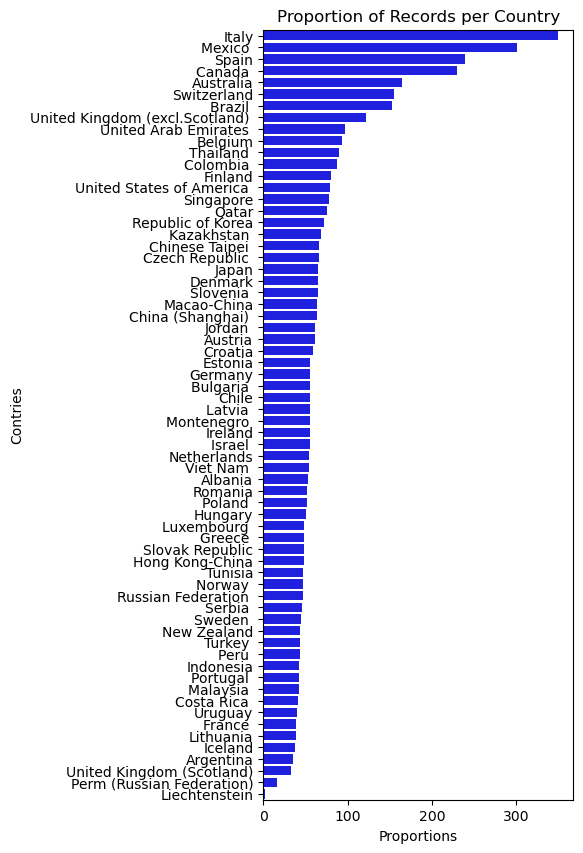

In [4]:
# Returns the sum of all not-null values in column
country_sum = clone5['National Centre 6-digit Code'].value_counts().sum()

# By default, returns the decreasing order of the frequency.
country_count = clone5['National Centre 6-digit Code'].value_counts()

## Return the highest frequency in the column
max_type_count = country_count[0]

total_records = len(clone5['National Centre 6-digit Code'])
country_ratio = country_count/total_records
country_order = country_count.index

## Return the maximum proportion, or in other words, 
## compute the length of the longest bar in terms of the proportion
prop = max_type_count / country_sum

# Specify the figure size in inches, for both X, and Y axes
plt.figure(figsize =[4,10])
sb.countplot(clone5, y = 'National Centre 6-digit Code', color = 'blue', order = country_order)
plt.xlabel('Number of Records')
plt.ylabel('Contries')
plt.xlabel('Proportions');
plt.title('Proportion of Records per Country')
plt.show();

As most of the frequent countries are among (OECD Countries), let us see if this proved by a pie chart:

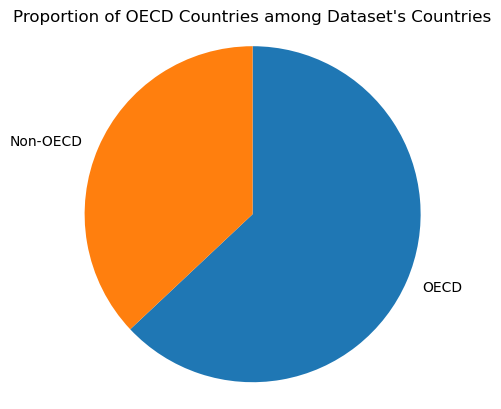

In [5]:
# Use the same dataset
sorted_counts = clone5['OECD country'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title("Proportion of OECD Countries among Dataset's Countries")
plt.axis('square');

## Distribution of Students PISA Test Score

The plot displaying PISA test scores reveals a unique logarithmic decline from 100 to 2000, with distinctive features including twin peaks at 130 and 200, a slight incline between 400-1000, and a sharp drop just before 400. These patterns highlight significant variations in educational performance among participating countries and regions. Further investigation is needed to understand the factors driving these trends, their policy implications, and how to address disparities and improve global educational outcomes effectively.


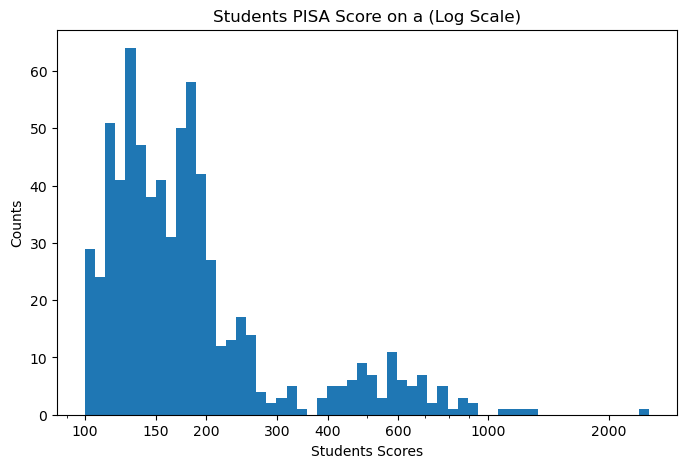

In [6]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2, np.log10(clone5['FINAL STUDENT WEIGHT'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = clone5, x = 'FINAL STUDENT WEIGHT', bins = bins)
plt.xscale('log')
plt.xticks([1e2,1.5e2, 2e2, 3e2, 4e2, 6e2, 1e3, 2e3],['100','150','200','300', '400', '600', '1000', '2000'])
plt.title('Students PISA Score on a (Log Scale)')
plt.xlabel('Students Scores')
plt.ylabel('Counts')
plt.show()

## Average Students Gender vs their Scores

Students' gender from different countries are plotted against their scores, which represents the males score more in the top scoring countries.
The variation in student weights across countries is evident, and within many countries, there are discernible differences between the average weights of male and female students.

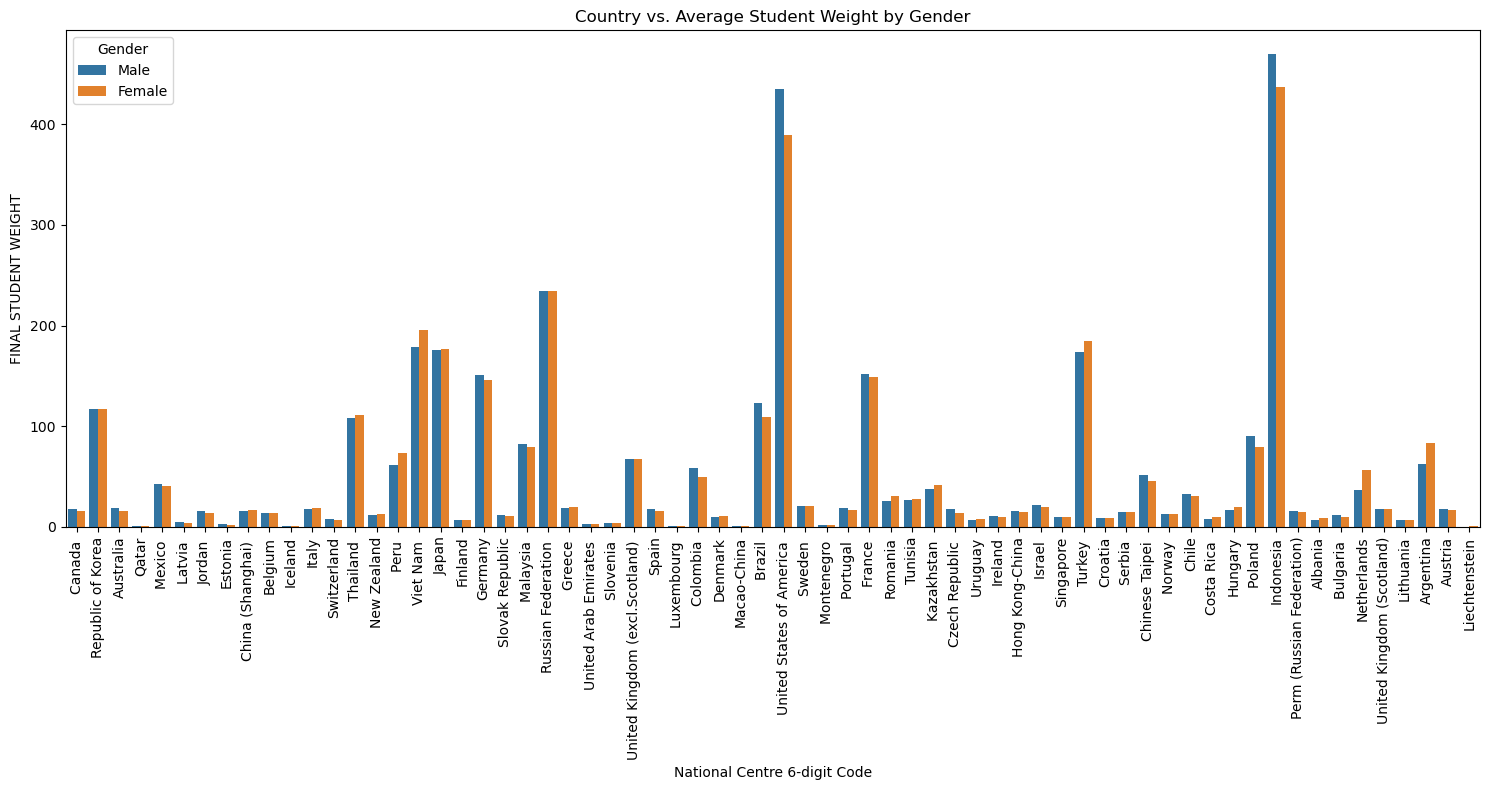

In [7]:
# 1. Country vs. Average Student Weight with Gender as a Hue
plt.figure(figsize=(15, 8))
sb.barplot(data=clone5, x='National Centre 6-digit Code', y='FINAL STUDENT WEIGHT', hue='Gender', ci=None)
plt.xticks(rotation=90)
plt.title("Country vs. Average Student Weight by Gender")
plt.tight_layout()
plt.show()

## Parental Educational Level and scoring of the PISA
Parents with students that score higher from Non OECD countries tend to be educationally be of lower levels.

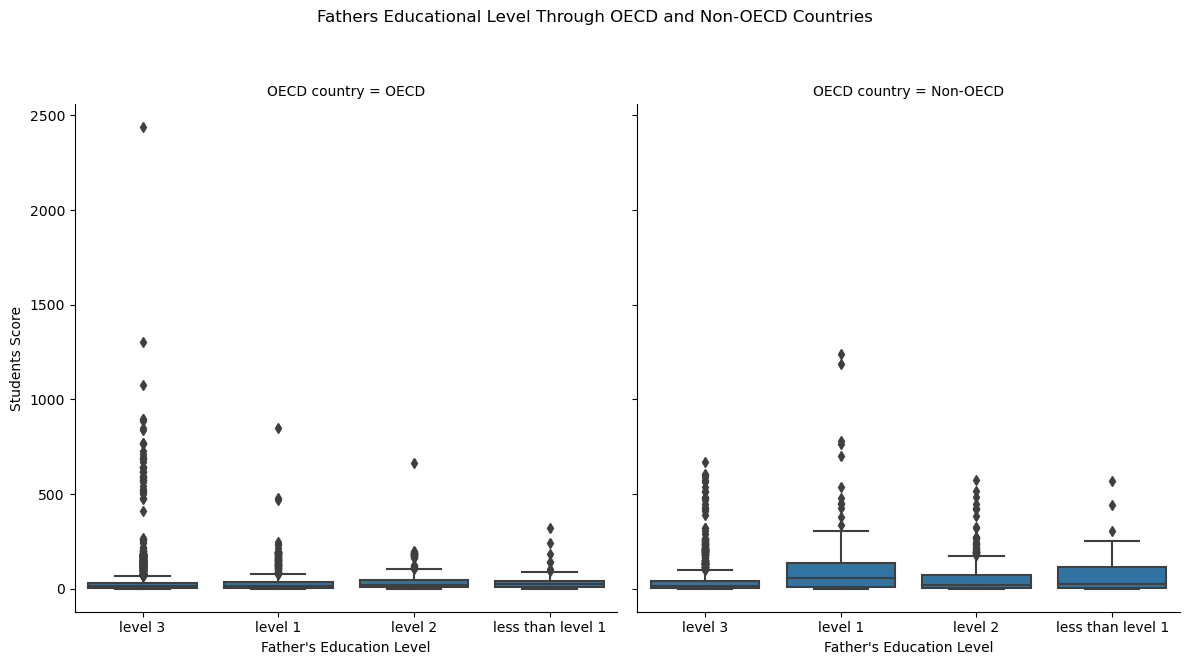

In [8]:
# scatter plot of grades vs. one parental education vs. OECD country relation

g = sb.FacetGrid(data =clone5, col ='OECD country', margin_titles = True, height = 6)
g.map(sb.boxplot, 'father Highest Schooling', 'FINAL STUDENT WEIGHT')
g.set_axis_labels('Father\'s Education Level', 'Students Score')
g.fig.suptitle('Fathers Educational Level Through OECD and Non-OECD Countries', y=1.1)
plt.show();


## Students Spending Time on Homeworks And Scoring 
Not nessecerily more studying time is related to higer scores. 

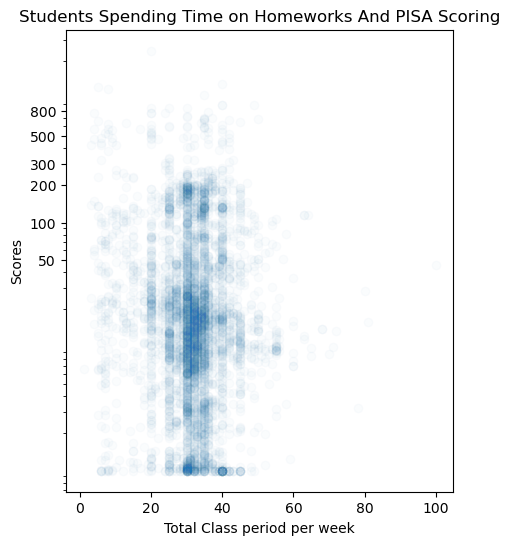

In [9]:
# scatter plot of grade vs. homework hours, with log transform on grade axis

plt.figure(figsize = [5, 6])
plt.scatter(data = clone5, x = 'No of ALL <class period> a week', y = 'FINAL STUDENT WEIGHT', alpha = 1/50)
plt.xlabel('Total Class period per week')
plt.yscale('log')
plt.yticks([5e1, 1e2, 2e2, 3e2, 5e2, 8e2], [50, '100', '200', '300', '500', '800'])
plt.ylabel('Scores')
plt.title('Students Spending Time on Homeworks And PISA Scoring')
plt.show();


## Country vs. Student Weight showing Parents's Education, Truancy, and Teacher Relationship
What this Multivariate plot can clearly show is that students of US and Indonesia score higher as they have parents of higher levels and a moderate ratio of Skipping classes, what is interesting is not necessriliy they have a very good relation with their teachers like other countries, of Mexico, Italy which is due to the count of the sample I have taken.

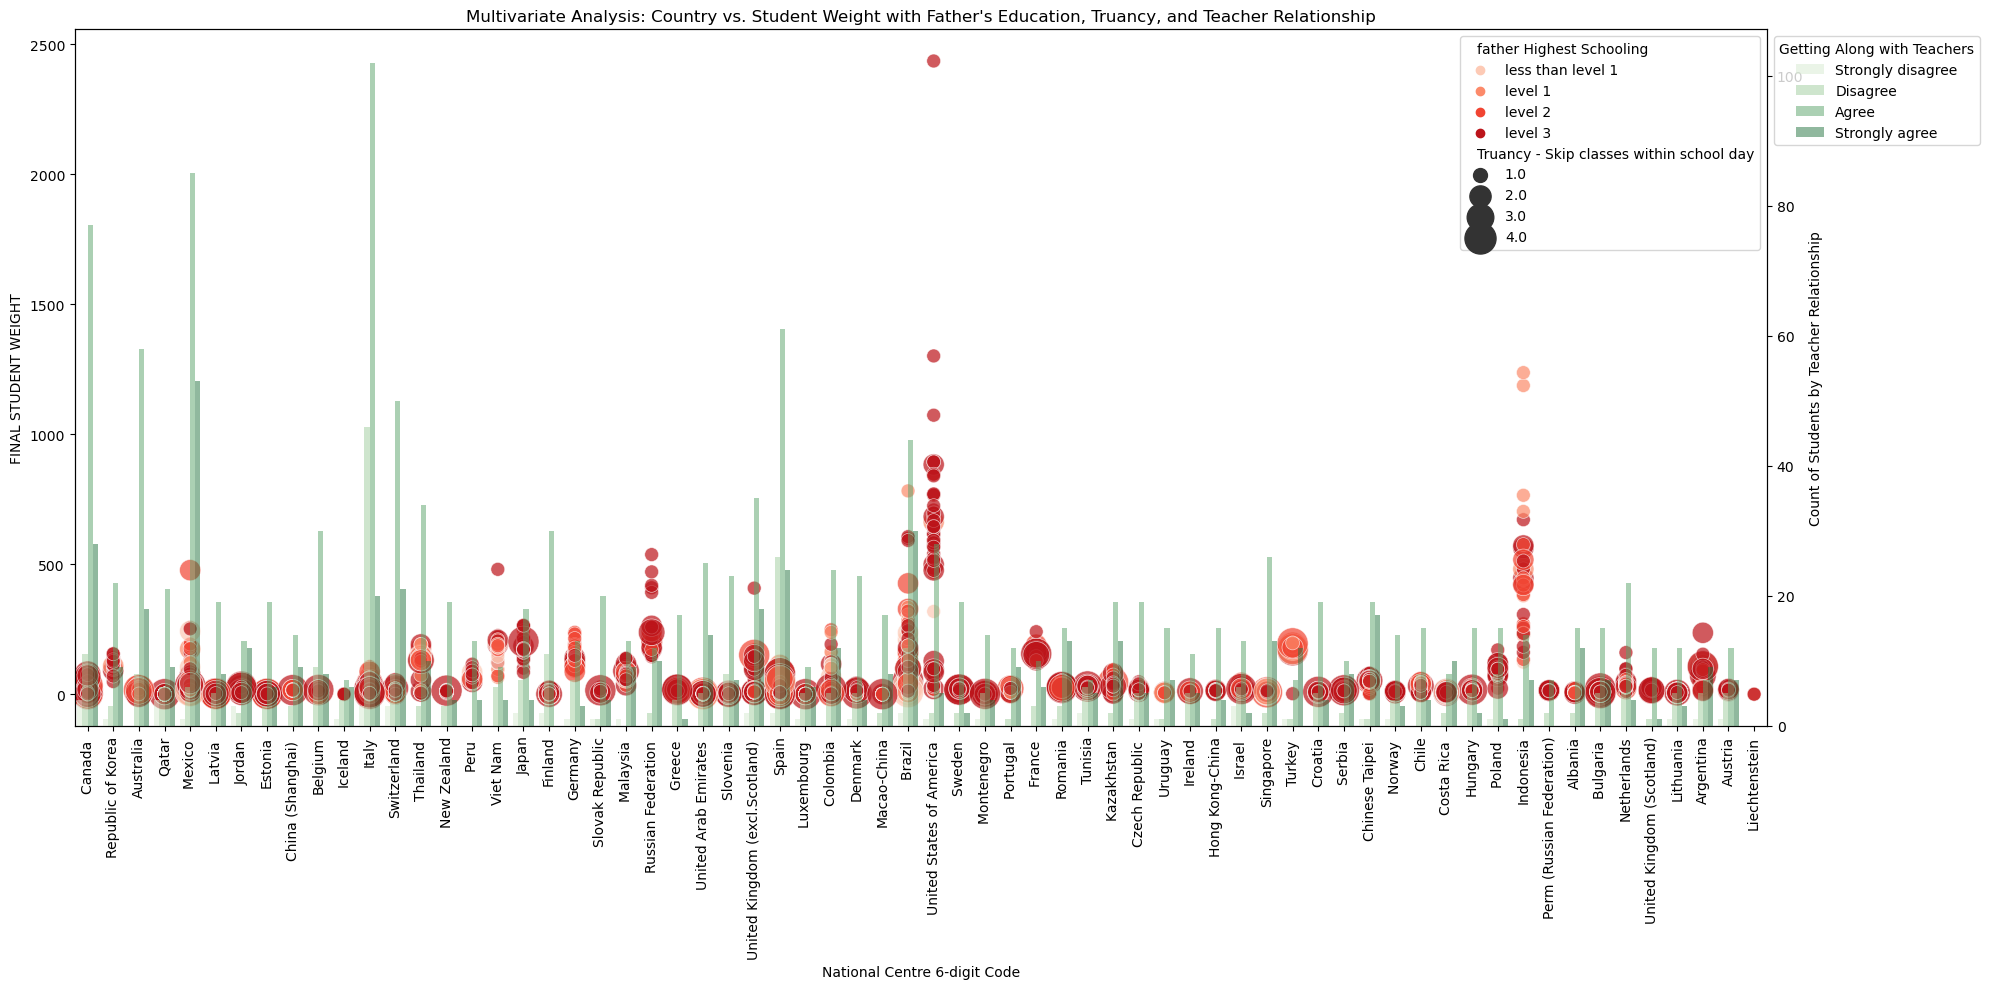

In [10]:
filtered_data = clone5.dropna(subset=['father Highest Schooling']).copy()
hue_order_father = sorted(map(str, filtered_data['father Highest Schooling'].unique()))


# Setting up the main figure and axis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Scatter plot for Country vs. Average Student Weight with Father's Education as hue and Truancy as size
sb.scatterplot(data=clone5, x='National Centre 6-digit Code', y='FINAL STUDENT WEIGHT', 
                hue=filtered_data['father Highest Schooling'] ,hue_order=hue_order_father,  size= 'Truancy - Skip classes within school day', sizes=(100, 500), 
                palette='Reds', edgecolor='w', linewidth=0.5, alpha=0.7, ax=ax1)

# Setting up the secondary y-axis for "Getting Along with Teachers"
ax2 = ax1.twinx()
order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
sb.countplot(data=clone5, x='National Centre 6-digit Code', hue='Student-Teacher Relation - Get Along with Teachers', ax=ax2, hue_order=order, palette='Greens', alpha=0.5)

# Formatting the plot
ax1.set_title("Multivariate Analysis: Country vs. Student Weight with Father's Education, Truancy, and Teacher Relationship")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("FINAL STUDENT WEIGHT")
ax2.set_ylabel("Count of Students by Teacher Relationship")
ax2.legend(title='Getting Along with Teachers', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show();



## Features Distribued Among US and Indonesian Students

The Indonesean distribution it is that not specifically students who have study more time score higher, instead students who have good relation with teachers and if they are of parents of higher education cscore higher. While students of US behave differently, they have more truancies and higher parental education leve, what is the same with the indoneasean education is that students who study harder does not nessecerily score higher, and as students get along better with teachers their probability of getting higher scores is more.

In [11]:
# select students of indonesia
clone4 = filtered_data.copy()
stu_indo = (clone4['National Centre 6-digit Code'] == 'Indonesia')
indostudent = clone4.loc[stu_indo,:]
hue_order_father1 = sorted(map(str, indostudent['father Highest Schooling'].unique()), reverse=False)

# select students of US
clone5 = filtered_data.copy()
clone5.to_csv('clone5.csv', index=False)
stu_us = (clone5['National Centre 6-digit Code'] == 'United States of America ')
usstudent = clone5.loc[stu_us,:]
hue_order_father2 = sorted(map(str, usstudent['father Highest Schooling'].unique()), reverse=False)



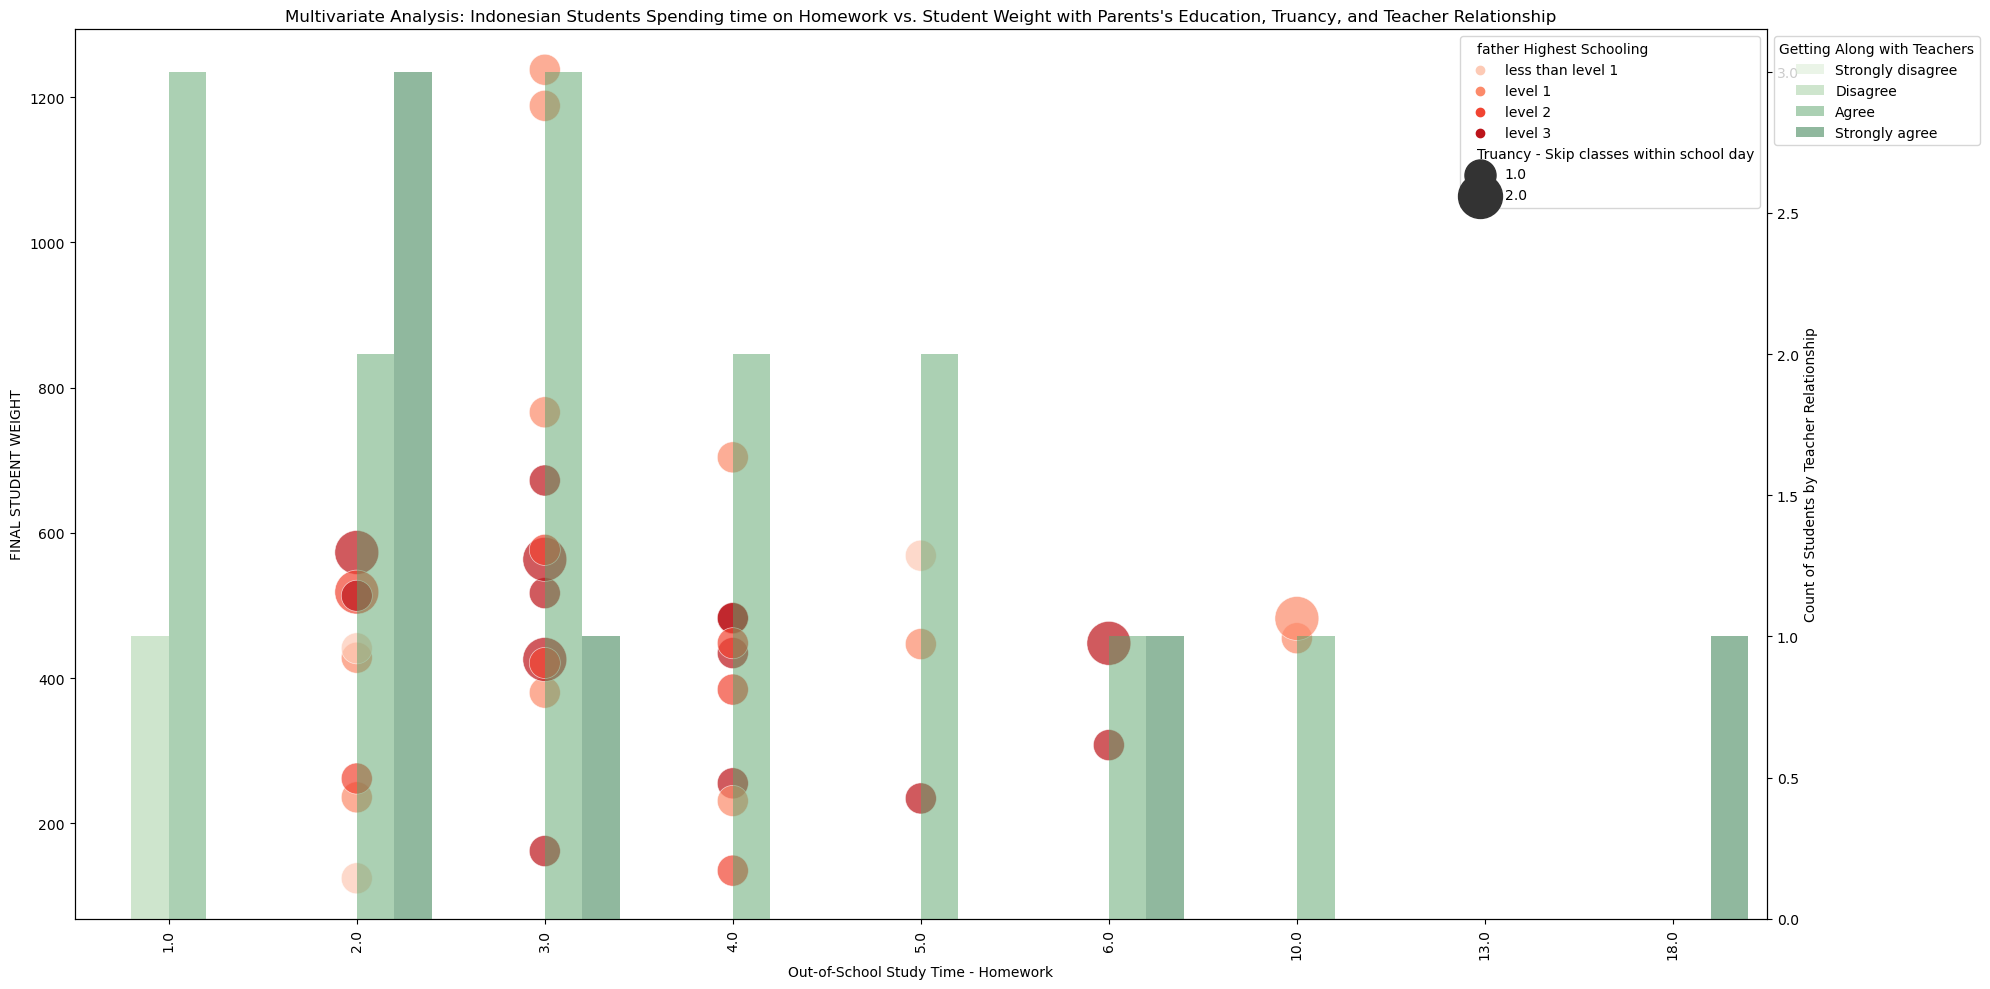

In [12]:
# Setting up the main figure and axis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Scatter plot for Country vs. Average Student Weight with Father's Education as hue and Truancy as size
sb.scatterplot(data=indostudent, x='Out-of-School Study Time - Homework', y='FINAL STUDENT WEIGHT', 
                hue='father Highest Schooling',hue_order=hue_order_father1, size= 'Truancy - Skip classes within school day', sizes=(500, 1000), 
                palette='Reds', edgecolor='w', linewidth=0.5, alpha=0.7, ax=ax1)

# Setting up the secondary y-axis for "Getting Along with Teachers"
ax2 = ax1.twinx()
order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
sb.countplot(data=indostudent, x='Out-of-School Study Time - Homework', hue='Student-Teacher Relation - Get Along with Teachers', ax=ax2, hue_order=order, palette='Greens', alpha=0.5)

# Formatting the plot
ax1.set_title("Multivariate Analysis: Indonesian Students Spending time on Homework vs. Student Weight with Parents's Education, Truancy, and Teacher Relationship")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("FINAL STUDENT WEIGHT")
ax2.set_ylabel("Count of Students by Teacher Relationship")
ax2.legend(title='Getting Along with Teachers', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show();


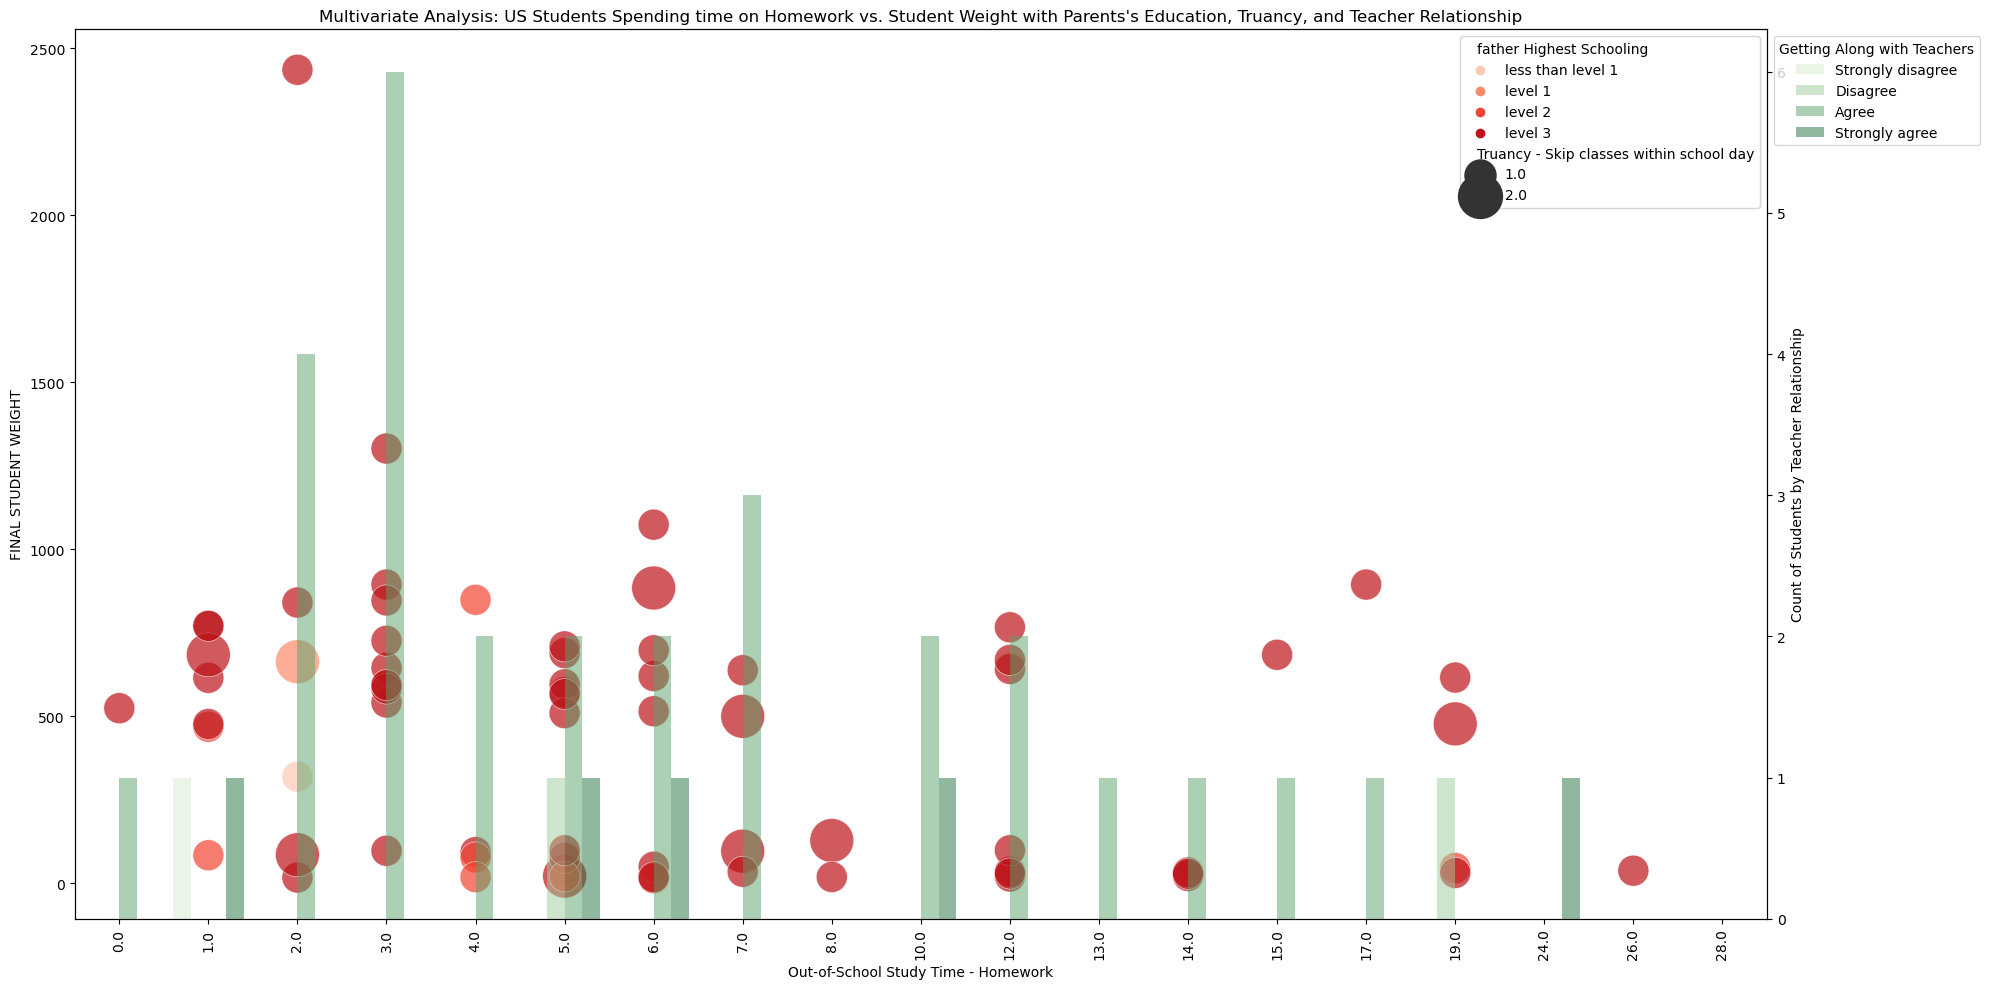

In [13]:
# Setting up the main figure and axis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Scatter plot for Country vs. Average Student Weight with Father's Education as hue and Truancy as size
sb.scatterplot(data=usstudent, x='Out-of-School Study Time - Homework', y='FINAL STUDENT WEIGHT', 
                hue='father Highest Schooling',hue_order=hue_order_father2,  size= 'Truancy - Skip classes within school day', sizes=(500, 1000), 
                palette='Reds', edgecolor='w', linewidth=0.5, alpha=0.7, ax=ax1)

# Setting up the secondary y-axis for "Getting Along with Teachers"
ax2 = ax1.twinx()
order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
sb.countplot(data=usstudent, x='Out-of-School Study Time - Homework', hue='Student-Teacher Relation - Get Along with Teachers', ax=ax2, hue_order=order, palette='Greens', alpha=0.5)

# Formatting the plot
ax1.set_title("Multivariate Analysis: US Students Spending time on Homework vs. Student Weight with Parents's Education, Truancy, and Teacher Relationship")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("FINAL STUDENT WEIGHT")
ax2.set_ylabel("Count of Students by Teacher Relationship")
ax2.legend(title='Getting Along with Teachers', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1836554 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
